# Data Preprocessing & Preview

In [277]:
## setup

# libraries
from pandas_datareader import data
from datetime import datetime
from ta import *
from sklearn import preprocessing
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# configure
%matplotlib inline
sns.set(style = 'whitegrid')

In [278]:
# S&P data

start_date = '2000-01-01'
end_date = '2019-07-01'

spy_dat = data.DataReader('SPY', 'yahoo', start_date, end_date)

In [279]:
spy_dat['EMA 5'] = trend.ema_indicator(spy_dat['Close'], n = 5)
spy_dat['EMA 10'] = trend.ema_indicator(spy_dat['Close'], n = 10)
spy_dat['EMA 15'] = trend.ema_indicator(spy_dat['Close'], n = 15)
spy_dat['EMA 20'] = trend.ema_indicator(spy_dat['Close'], n = 20)
spy_dat['EMA 40'] = trend.ema_indicator(spy_dat['Close'], n = 40)
spy_dat['EMA 60'] = trend.ema_indicator(spy_dat['Close'], n = 60)
spy_dat['EMA 100'] = trend.ema_indicator(spy_dat['Close'], n = 100)
spy_dat['EMA 150'] = trend.ema_indicator(spy_dat['Close'], n = 150)

In [280]:
spy_dat.head()

,High,Low,Open,Close,Volume,Adj Close,EMA 5,EMA 10,EMA 15,EMA 20,EMA 40,EMA 60,EMA 100,EMA 150
Date,,,,,,,,,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.934494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.987312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,97.160843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.599319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,101.151367,142.015403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


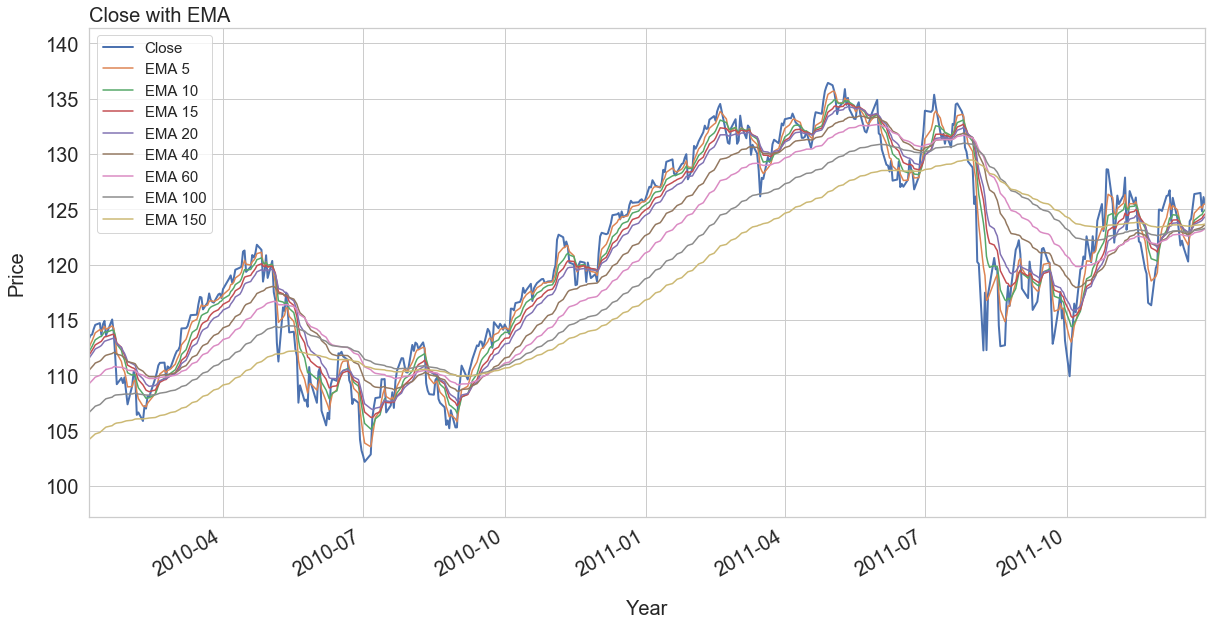

In [281]:
# subset data
spy_close = spy_dat['Close'].loc['2010-01-01':'2012-01-01']

# plot close price
spy_close.plot(figsize = (20, 10), linewidth = 2, fontsize = 20) 

# plot indicators
plt.plot(spy_dat['EMA 5'])
plt.plot(spy_dat['EMA 10'])
plt.plot(spy_dat['EMA 15'])
plt.plot(spy_dat['EMA 20'])
plt.plot(spy_dat['EMA 40'])
plt.plot(spy_dat['EMA 60'])
plt.plot(spy_dat['EMA 100'])
plt.plot(spy_dat['EMA 150'])

# legend
plt.legend(loc = 'upper left', fontsize = 15)

# set axes limit
margin = 5
plt.ylim([min(spy_close) - margin, max(spy_close) + margin])

# labels
plt.xlabel('Year', fontsize = 20, labelpad = 20)
plt.ylabel('Price', fontsize = 20, labelpad = 20)
plt.title('Close with EMA', loc = 'left', fontsize = 20);

In [217]:
# raw diff btw close and ema
spy_diff = pd.DataFrame()
spy_diff['Diff 5'] = spy_dat['Close'] - spy_dat['EMA 5']
spy_diff['Diff 10'] = spy_dat['Close'] - spy_dat['EMA 10']
spy_diff['Diff 15'] = spy_dat['Close'] - spy_dat['EMA 15']
spy_diff['Diff 20'] = spy_dat['Close'] - spy_dat['EMA 20']
spy_diff['Diff 40'] = spy_dat['Close'] - spy_dat['EMA 40']
spy_diff['Diff 60'] = spy_dat['Close'] - spy_dat['EMA 60']
spy_diff['Diff 100'] = spy_dat['Close'] - spy_dat['EMA 100']
spy_diff['Diff 150'] = spy_dat['Close'] - spy_dat['EMA 150']

In [218]:
spy_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4905 entries, 2000-01-03 to 2019-07-02
Data columns (total 8 columns):
Diff 5      4901 non-null float64
Diff 10     4896 non-null float64
Diff 15     4891 non-null float64
Diff 20     4886 non-null float64
Diff 40     4866 non-null float64
Diff 60     4846 non-null float64
Diff 100    4806 non-null float64
Diff 150    4756 non-null float64
dtypes: float64(8)
memory usage: 344.9 KB


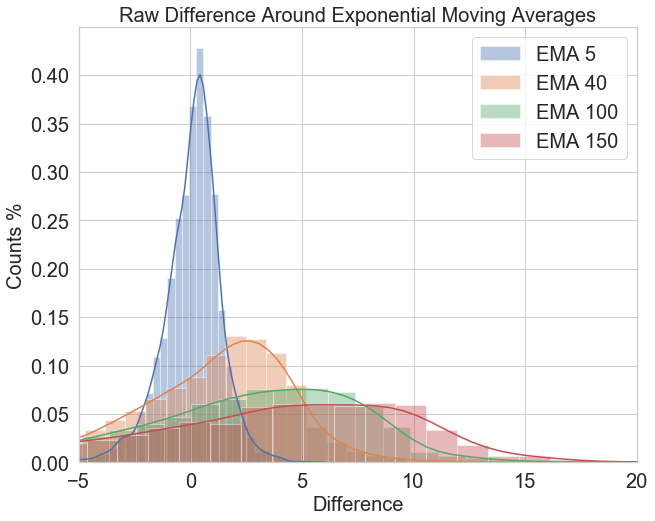

In [219]:
# distribution of diff
plt.figure(figsize = (10, 8))
sns.distplot(pd.DataFrame(spy_diff['Diff 5']).dropna(), bins = 50)
sns.distplot(pd.DataFrame(spy_diff['Diff 40']).dropna(), bins = 50)
sns.distplot(pd.DataFrame(spy_diff['Diff 100']).dropna(), bins = 50)
sns.distplot(pd.DataFrame(spy_diff['Diff 150']).dropna(), bins = 50)

# legend
plt.legend(labels = ['EMA 5', 'EMA 40', 'EMA 100', 'EMA 150'], loc = 'upper right', fontsize = 20)

# set limits
plt.xlim([-5, 20])

# labels
plt.title('Raw Difference Around Exponential Moving Averages', fontsize = 20)
plt.xlabel('Difference', fontsize = 20)
plt.ylabel('Counts %', fontsize = 20)

# adjust labels
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

In [220]:
# define normalization function
def norm(x):
    return x / max(x)

In [221]:
# normalize
spy_norm_dirty = spy_diff.reset_index()
spy_norm = spy_norm_dirty.drop(columns = ['Date'])
spy_norm = spy_norm.dropna()
spy_norm = spy_norm.apply(lambda t: norm(t), axis = 0)

In [222]:
spy_norm.head()

,Diff 5,Diff 10,Diff 15,Diff 20,Diff 40,Diff 60,Diff 100,Diff 150
149,0.195871,0.115745,0.053832,0.024399,0.010989,0.023832,0.039067,0.044852
150,0.344218,0.295242,0.232300,0.198899,0.128193,0.117827,0.111646,0.104493
151,0.298147,0.306022,0.262791,0.236793,0.159782,0.144406,0.132916,0.122291
152,0.046167,0.107137,0.097658,0.087938,0.067883,0.071939,0.077729,0.077335
153,-0.056966,0.005293,0.009387,0.006939,0.016213,0.030638,0.045970,0.051381


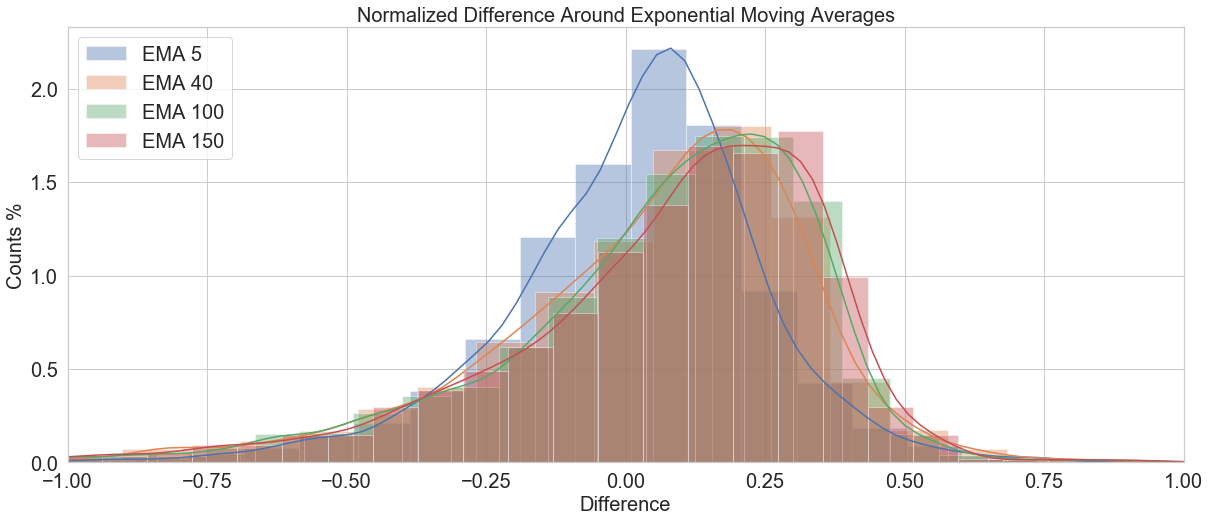

In [223]:
# distribution of diff
plt.figure(figsize = (20, 8))
sns.distplot(pd.DataFrame(spy_norm['Diff 5']).dropna(), bins = 30)
sns.distplot(pd.DataFrame(spy_norm['Diff 40']).dropna(), bins = 30)
sns.distplot(pd.DataFrame(spy_norm['Diff 100']).dropna(), bins = 30)
sns.distplot(pd.DataFrame(spy_norm['Diff 150']).dropna(), bins = 30)

# legend
plt.legend(labels = ['EMA 5', 'EMA 40', 'EMA 100', 'EMA 150'], loc = 'upper left', fontsize = 20)

# set limits
plt.xlim([-1, 1])

# labels
plt.title('Normalized Difference Around Exponential Moving Averages', fontsize = 20)
plt.xlabel('Difference', fontsize = 20)
plt.ylabel('Counts %', fontsize = 20)

# adjust labels
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

In [224]:
# normalized standard deviation
std_norm = np.std(spy_norm)
std_norm

Diff 5      0.247581
Diff 10     0.291704
Diff 15     0.314061
Diff 20     0.336517
Diff 40     0.300620
Diff 60     0.290444
Diff 100    0.287630
Diff 150    0.291859
dtype: float64

In [225]:
# recover actual standard deviations
col_max = spy_diff.dropna().apply(max, axis = 0)
std_raw = std_norm * col_max
std_raw

Diff 5      1.352033
Diff 10     2.082697
Diff 15     2.596714
Diff 20     3.013270
Diff 40     4.250117
Diff 60     5.185596
Diff 100    6.715576
Diff 150    8.336967
dtype: float64

In [226]:
std_5 = std_raw.loc['Diff 5']
diff_5 = spy_diff['Diff 5']
multiplier = 1.5
fil_std_5 = pd.Series(diff_5[(diff_5 < -std_5 * multiplier) | (diff_5 > std_5 * multiplier)])
fil_std_5.head()

Date
2000-01-07    3.734597
2000-01-10    2.687218
2000-01-24   -3.197842
2000-01-28   -3.815120
2000-02-11   -2.225239
Name: Diff 5, dtype: float64

In [227]:
diff_vals = list(diff_5)
fil_vals = list(fil_std_5)
bool_std = pd.Series(diff_vals).apply(lambda t: t in fil_vals)
df_signal = pd.DataFrame()
df_signal['Norm 5'] = list(spy_norm['Diff 5'])
df_signal['Upper 1SD'] = std_norm.loc['Diff 5']
df_signal['Lower 1SD'] = -std_norm.loc['Diff 5']
df_signal['Upper 2SD'] = 2 * std_norm.loc['Diff 5']
df_signal['Lower 2SD'] = 2 * -std_norm.loc['Diff 5']
df_signal['Base SD'] = 0
df_signal['Bool 5'] = list(bool_std[149:])
df_signal.index = diff_5.index[149:]
df_signal.head(10)

,Norm 5,Upper 1SD,Lower 1SD,Upper 2SD,Lower 2SD,Base SD,Bool 5
Date,,,,,,,
2000-08-04,0.195871,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-07,0.344218,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-08,0.298147,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-09,0.046167,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-10,-0.056966,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-11,0.045952,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-14,0.259531,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-15,0.157761,0.247581,-0.247581,0.495161,-0.495161,0,False
2000-08-16,0.040320,0.247581,-0.247581,0.495161,-0.495161,0,False


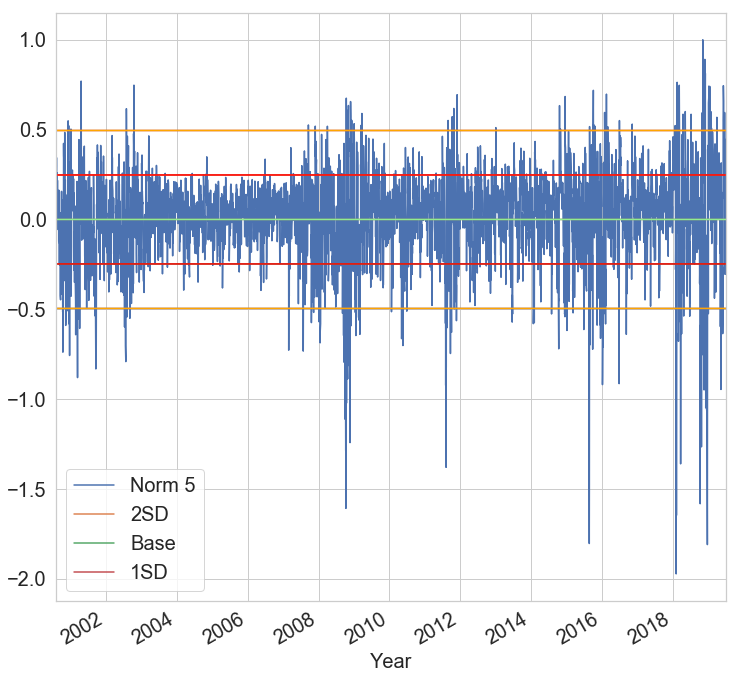

In [228]:
df_signal.plot(figsize = (12, 12), fontsize = 20)

plt.plot(df_signal['Upper 1SD'], color = 'red')
plt.plot(df_signal['Lower 1SD'], color = 'red')
plt.plot(df_signal['Upper 2SD'], color = 'orange')
plt.plot(df_signal['Lower 2SD'], color = 'orange')
plt.plot(df_signal['Base SD'], color = 'lightgreen')


plt.legend(labels = ['Norm 5', '2SD', 'Base', '1SD'], loc = 'lower left', fontsize = 20)

plt.xlabel('Year', fontsize = 20);

In [229]:
df_bs = pd.DataFrame()
df_bs['EMA 5'] = spy_dat['EMA 5']
df_bs['Bool 5'] = list(bool_std)
df_bs.head()

,EMA 5,Bool 5
Date,,
2000-01-03,NaN,False
2000-01-04,NaN,False
2000-01-05,NaN,False
2000-01-06,NaN,False
2000-01-07,142.015403,True


# How can we tell if a stock is mean reverting?

## Stationary stocks, where the change in price in the next period is proportional to the difference in the mean price and the current price, are mean reverting. We can determine stationarity through the Augmented Dicky-Fuller (ADF) test.

## Cointegrated stocks are a combination of stocks that result in a stationary portfolio. 

# Example: GLD vs GDX (ADF and Cointegrations)

In [230]:
# get data
start_date = '2006-05-01'
end_date = '2007-11-01'

gld_dat = data.DataReader('GLD', 'yahoo', start_date, end_date)
gdx_dat = data.DataReader('GDX', 'yahoo', start_date, end_date)

gld_dat = gld_dat.iloc[1:368,]

In [231]:
gld_dat.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-05-02,66.570000,65.559998,65.599998,66.550003,6194800,66.550003
2006-05-03,67.139999,65.330002,67.139999,66.459999,11554600,66.459999
2006-05-04,67.669998,66.220001,66.760002,67.480003,14123500,67.480003
2006-05-05,68.010002,67.059998,67.510002,67.989998,9270900,67.989998
2006-05-08,67.610001,66.750000,67.199997,67.559998,6528700,67.559998


In [232]:
gdx_dat.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-05-22,37.290001,35.869999,36.520000,37.230000,197100.0,34.280224
2006-05-23,39.220001,37.750000,37.750000,37.959999,620900.0,34.952393
2006-05-24,37.570000,35.869999,37.130001,36.520000,638600.0,33.626480
2006-05-25,38.320000,36.980000,37.180000,38.320000,367000.0,35.283867
2006-05-26,38.740002,37.770000,38.740002,38.549999,269400.0,35.495640


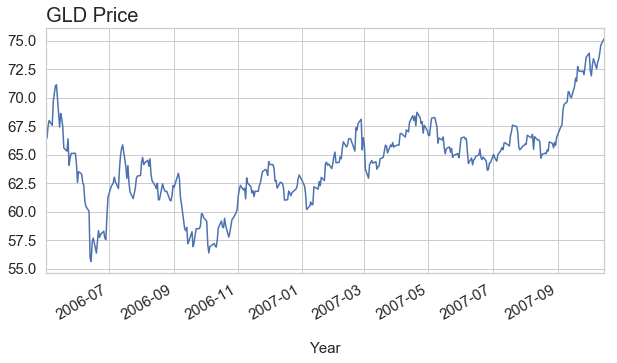

In [233]:
gld_dat['Close'].plot(figsize = (10, 5), fontsize = 15)
plt.xlabel('Year', fontsize = 15, labelpad = 20)
plt.title('GLD Price', fontsize = 20, loc = 'left');

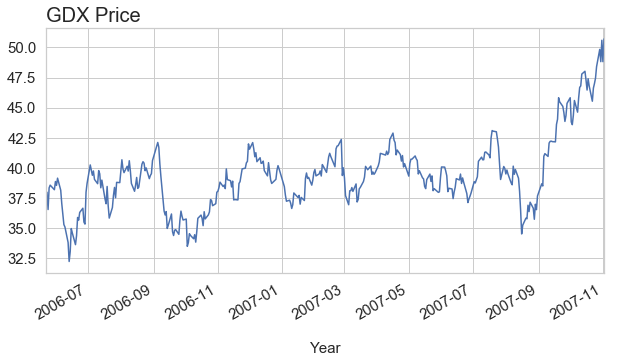

In [234]:
gdx_dat['Close'].plot(figsize = (10, 5), fontsize = 15)
plt.xlabel('Year', fontsize = 15, labelpad = 20)
plt.title('GDX Price', fontsize = 20, loc = 'left');

In [235]:
# calc spread
spread = pd.Series(np.array(gld_dat['Close']) 
                   - 1.6294 * np.array(gdx_dat['Close']))

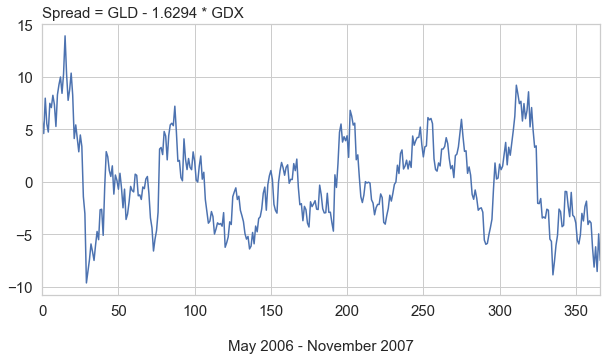

In [236]:
spread.plot(figsize = (10, 5), fontsize = 15)
plt.xlabel('May 2006 - November 2007', fontsize = 15, labelpad = 20)
plt.title('Spread = GLD - 1.6294 * GDX', fontsize = 15, loc = 'left');

In [237]:
adf_result = adfuller(spread)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.710155
p-value: 0.003973
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Clearly, the p-value is less than 0.05; therefore, we reject the null hypothesis that the data is non-stationary. The cointegrated stocks form a stationary portfolio.

# Determining Cointegration Among Many Stocks

In [238]:
# library
import pandas_datareader.data as web
from statsmodels.tsa.stattools import coint

In [239]:
## data preprocessing 

# params
stocks = ['ARCH', 'BCEI', 'CPE', 'DNR', 'ESTE']
start_date = '2000-01-01'
end_date = '2019-07-01'

# combine ticker data
lst_coint = list()
for i in range(len(stocks)):
    stock = stocks[i]
    tmp = web.DataReader(stock, 'yahoo', start_date, end_date)
    tmp['Ticker'] = stock
    lst_coint.append(tmp)
df_coint = pd.concat(lst_coint, sort = False)

# group data by ticker
df_coint_grpd = df_coint.groupby('Ticker')
df_basket = pd.DataFrame(df_coint_grpd, columns = ['Ticker', 'Data'])
df_basket.head()

,Ticker,Data
0,ARCH,High Low Open ...
1,BCEI,High Low O...
2,CPE,High Low Open Close...
3,DNR,High Low Open C...
4,ESTE,High Low Open Close Volum...


In [240]:
df_picked = pd.DataFrame()
for i in range(len(df_basket)):
    ticker = df_basket['Ticker'][i]
    close = df_basket['Data'][i]['Close']
    df_picked[ticker] = close
df_picked.head()

,ARCH,BCEI,CPE,DNR,ESTE
Date,,,,,
2016-01-04,0.91,594.764038,8.10,2.04,13.46
2016-01-05,0.94,576.909973,7.91,2.01,13.46
2016-01-06,0.91,532.274780,7.38,1.71,13.20
2016-01-07,0.79,494.334839,7.04,1.61,13.01
2016-01-08,0.83,501.030121,7.26,1.63,13.08


In [241]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

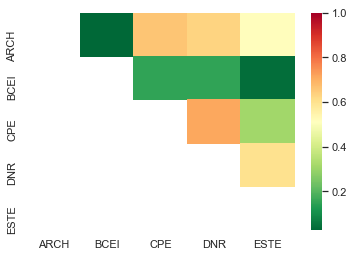

In [242]:
data = df_picked # set data

scores, pvalues, pairs = find_cointegrated_pairs(data)
m = [0,0.2,0.4,0.6,0.8,1]
sns.heatmap(pvalues, xticklabels=stocks, 
                yticklabels=stocks, cmap='RdYlGn_r',
                mask = (pvalues >= 0.98))
plt.show()

## Test ARCH vs. BCEI Cointegration

ADF Statistic: -0.617377
p-value: 0.867007
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


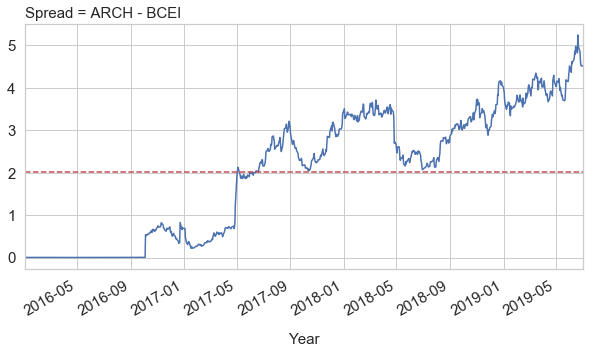

In [256]:
s1 = 'ARCH'
s2 = 'BCEI'
spread = df_picked[s1] / df_picked[s2]

start = '2000-01-01'
end = '2019-07-01'

sub_dat = spread.loc[start:end]
sub_dat.plot(figsize = (10, 5), fontsize = 15)
plt.axhline(np.mean(sub_dat), color = 'r', linestyle = '--')
plt.title('Spread = ' + s1 + ' - ' + s2, loc = 'left', fontsize = 15)
plt.xlabel('Year', fontsize = 15, labelpad = 15)

# ADF test
adf_result = adfuller(spread)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

Fails the ADF test. Non-stationary timeseries.

## TEST BCEI vs. ESTE Cointegration

ADF Statistic: -1.783659
p-value: 0.388604
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


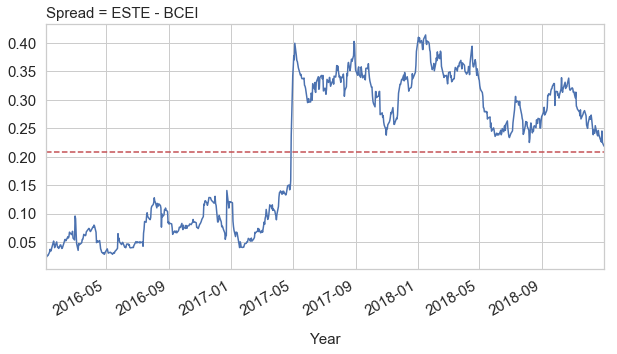

In [254]:
s1 = 'ESTE'
s2 = 'BCEI'
spread = df_picked[s1] / df_picked[s2]

start = '2000-01-01'
end = '2019-01-01'

sub_dat = spread.loc[start:end]
sub_dat.plot(figsize = (10, 5), fontsize = 15)
plt.axhline(np.mean(sub_dat), color = 'r', linestyle = '--')
plt.title('Spread = ' + s1 + ' - ' + s2, loc = 'left', fontsize = 15)
plt.xlabel('Year', fontsize = 15, labelpad = 15)

# ADF test
adf_result = adfuller(spread)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

In [252]:
def coint_results(s1, s2, start, end):
    # calc spread
    spread = df_picked[s1] / df_picked[s2]
    
    # subset data 
    sub_dat = spread.loc[start:end]
    
    # plot
    sub_dat.plot(figsize = (10, 5), fontsize = 15)
    plt.axhline(np.mean(sub_dat), color = 'r', linestyle = '--')
    plt.title('Spread = ' + s1 + ' / ' + s2, loc = 'left', fontsize = 15)
    plt.xlabel('Year', fontsize = 15, labelpad = 15)

    # ADF test
    adf_result = adfuller(spread)
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))

In [257]:
df_picked.columns

Index(['ARCH', 'BCEI', 'CPE', 'DNR', 'ESTE'], dtype='object')

ADF Statistic: -2.575385
p-value: 0.098192
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


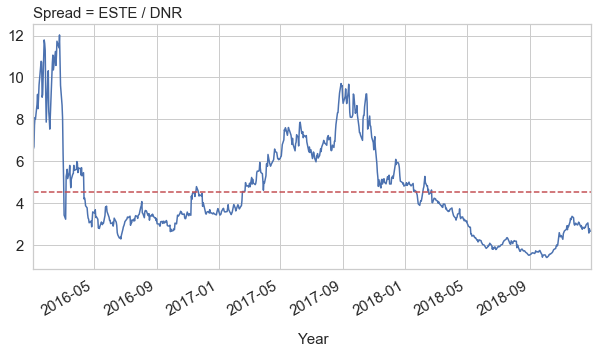

In [261]:
coint_results('ESTE', 'DNR', '2000-01-01', '2019-01-01')

In [270]:
start_date = '2019-06-13'
end_date = '2019-07-10'

desp_dat = data.DataReader('DESP', 'yahoo', start_date, end_date)

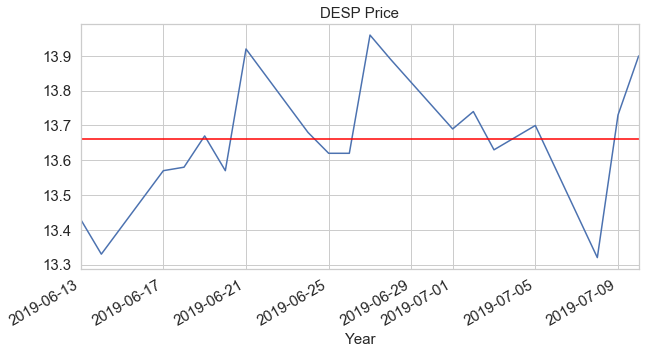

In [275]:
desp_dat['Close'].plot(figsize = (10, 5), fontsize = 15)
plt.axhline(y = desp_dat['Close'].mean(), color = 'red')
plt.title('DESP Price', fontsize = 15)
plt.xlabel('Year', fontsize = 15);